# TP5. Descente de gradient à pas stochastique

### Import des librairies

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import time
import matplotlib.patches as patches 

### Fonction permettant de dessiner les courbes de niveaux d'une fonction de 2 variables

In [2]:
def courbes_de_niveaux(fct, x1_min=-5, x1_max=5, x2_min=-5, x2_max=5):
    x1_values = np.linspace(x1_min, x1_max,100)
    x2_values = np.linspace(x2_min, x2_max,100)
    fct_values = np.array([[fct(x1,x2) for x1 in x1_values] for x2 in x2_values])    
    #if 'cmap' not in kwargs: kwargs['cmap'] = 'RdBu'
    plt.contour(x1_values, x2_values, fct_values, 40)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.colorbar()

### Fonction permettant de dessiner la trajectoire de l'algorithme ci-dessous

In [3]:
# w_list sous la forme d'une liste  coordonnées [[b[0],w[0]],[b[1],w[1]],...]
def trajectoire(Wlist, fct, x1_min=-5, x1_max=5,x2_min=-5,x2_max=5):
    courbes_de_niveaux(fct, x1_min, x1_max,x2_min,x2_max)     
    if len(Wlist) > 0:
        traj=[]
        patch = patches.Rectangle((x1_min, x2_min),x1_max-x1_min,x2_max-x2_min) 
        trajectory=np.array(Wlist)
        plt.plot(trajectory[:,0], trajectory[:,1], 'o--',clip_path = patch,clip_on = True)
    plt.title('Trajectoire de la descente de gradient')
    plt.xlabel('$b$')
    plt.ylabel('$w$')

## Algorithme du gradient stochastique 

On considère un ensemble de points $(x_i,y_i)$, $i\in\{1,\ldots,n\}$.

On cherche à minimiser $f(b,w)=\sum_i (b+wx_i-y_i)^2$.

Lorsque $n$ est très grand, le calcul du gradient de $f$ est très coûteux en terme de temps de calcul.

Au lieu de calculer le gradient de toute la somme, l'algorithme de descende de gradient *stochastique* fonctionne ainsi : <br/>
À l'étape $k$, on se situe au point $(b_k,w_k)$
- On choisit aléatoirement un point $(x_i,y_i)$
- On calcule le gradient de $f_i:(b,w)\mapsto (b+wx_i-y_i)^2$ en $(b_k,w_k)$
- On se déplace au point $(b_{k+1},w_{k+1})$ tel que $$\left\{\begin{array}{l}b_{k+1}=b_k-\tau\times \frac{\partial f_i}{\partial b}(b_k,w_k)\\ w_{k+1}=w_k-\tau\times\frac{\partial f_i}{\partial w}(b_k,w_i)\end{array}\right.$$
où $\tau$ est le pas d'apprentissage.

### Génération des points

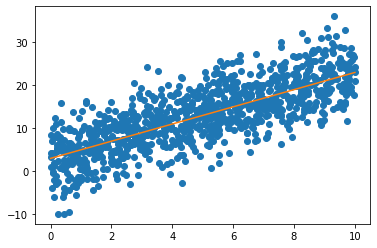

In [140]:
# Génère des nombres aléatoires autour de la droite y=2*x+3
X=np.random.uniform(0, 10, 1000) #1000 points répartis entre 0 et 10 selon une loi uniforme
Y=[2*x+3+np.random.normal(0,5) for x in X] #chaque yi est égale à 2*xi+3+une erreur issue de la loi normale de moyenne 0 et de variance 5
plt.plot(X,Y,'o')
plt.plot([0,10],[3,23])

**Exercice.**

Compte tenu des données d'apprentissage utilisées, quelle est la solution $(b^*,w^*)$ minimisant $f(b,w)=\sum_i (b+wx_i-y_i)^2$ ?

### Définition de la fonction, de son gradient, et du gradient stochastique

In [5]:
def f(b,w):
  return np.sum([(b+w*X[i]-Y[i])**2 for i in range(len(X))])

# Gradient de f en (b,w)
def df(b,w):
  return [np.sum([2*(b+w*X[i]-Y[i]) for i in range(len(X))]),np.sum([2*(b+w*X[i]-Y[i])*X[i] for i in range(len(X))])]

# Gradient stochastique
tailleX=len(X)
def df_stochastique(b,w):
    c=np.random.choice(tailleX)
    return [2*(b+w*X[c]-Y[c]),2*(b+w*X[c]-Y[c])*X[c]]

### Représentation graphique de $f$

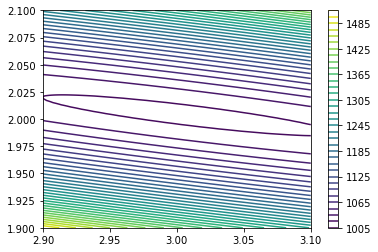

In [87]:
courbes_de_niveaux(f,2.9,3.1,1.9,2.1)

**Exercice 1.**
1. D'après le graphique, en quel $(b^*,w^*)$ la fonction $f(b,w)=\sum_i (b+wx_i-y_i)^2$ atteint-elle son minimum ?
2. a) Représenter $f$ pour $b\in[2.9,3,1]$ et $w\in[1.9,2.1]$.<br/>
   b) Quelle est approximativement la valeur minimale de $f$ ?<br/>
   c) En déduire la valeur moyenne de $(b+wx_i-y_i)^2$ en $(b^*,w^*)$ ?<br/>
3. a) Choisir un point $(x_i,y_i)$ au hasard et calculer $(b_i^*,w_i^*)$ minimisant $(b,w)\mapsto (b_i+w_i\times x_i-y_i)^2$.<br/>
   b) Calculer le gradient de $f$ en $(b,w)$.
4. Est-il justifié d'arrêter l'algorithme du gradient stochastique lorsque le gradient stochastique est inférieur à un certain seuil ?
    



## Mise en place de l'algorithme

In [76]:
def descente(gradf,X0,tau=0.01,tolerance=1e-6,Nbiterations=1000):
    x=X0[0]
    y=X0[1]
    L=[]
    tautau=1
    for i in range(Nbiterations):
        g = gradf(x,y)
        if g[0]**2+g[1]**2<tolerance:
            print('L\'algorithme a convergé en',i,'iterations.\n Solution atteinte :\n b=',x,'\n w=',y,'\n grad f=',g[0],',',g[1])
            return L
        L.append([x,y])
        x=x-tau*g[0]
        y=y-tau*g[1]
    print('L\'algorithme n\'a pas convergé.\n Solution atteinte :\n b=',x,'\n w=',y,'\n grad f=',g[0],',',g[1])
    return L

### Solution en utilisant la descente de gradient non stochastique

In [141]:
time_start = time.perf_counter()
Xi=descente(df,[-4,4],1e-5,1e-1,5000)
print('Temps de calcul : %5.1f sec'%(time.perf_counter() - time_start))
bstar=Xi[len(Xi)-1][0]
wstar=Xi[len(Xi)-1][1]
print('Gradient de f en cette solution:', df(bstar,wstar))
print('Erreur :\n b:',(bstar-3)/3*100,'%\n w:',(wstar-2)/2*100,'%')

L'algorithme a convergé en 1849 iterations.
 Solution atteinte :
 b= 2.8288590664928064 
 w= 2.0550659873710746 
 grad f= -0.31204711746892144 , 0.04790309036570761
Temps de calcul :   4.6 sec
Gradient de f en cette solution: [-0.3136250291465217, 0.04814531930310295]
Erreur :
 b: -5.704802325249503 %
 w: 2.7533234412133734 %


### Représentation graphique de l'algorithme

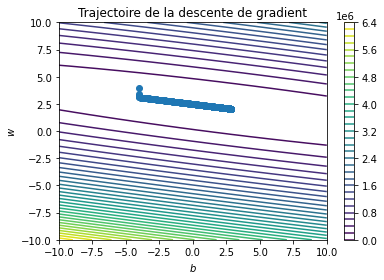

In [142]:
trajectoire(Xi,f,-10,10,-10,10)

### Solution en utilisant le gradient stochastique

In [143]:
time_start = time.perf_counter()
Xi=descente(df_stochastique,[-4,4],1e-5,1e-1,5000)
print('Temps de calcul : %5.1f sec'%(time.perf_counter() - time_start))

L'algorithme a convergé en 73 iterations.
 Solution atteinte :
 b= -4.004405448268549 
 w= 3.957052034470237 
 grad f= 0.03748507953197944 , 0.08002224800372842
Temps de calcul :   0.0 sec


**Exercice.**
1. Que remarquez-vous en terme de temps de calcul ? En terme de validité de la solution ?
1. Les paramètres sont-ils adaptés ? D'après l'exercice 1, quels paramètres seraient-plus adaptés ?
2. Ci-dessous, l'algorithme est lancé avec une tolérance de $10^{-10}$ assez faible pour que l'algorithme de converge pas a priori. Faites varier pas et nombre d'itérations afin d'atteindre une solution acceptable (erreurs de moins de 5%) en un minimum de temps. Vaut-il mieux un pas grand et un nombre d'itération faibles, ou un pas petit et un nombre d'itérations élevé ?

In [161]:
time_start = time.perf_counter()
Xi=descente(df_stochastique,[-4,4],1e-3/2,1e-10,50000)
print('Temps de calcul : %5.1f sec'%(time.perf_counter() - time_start))
bstar=Xi[len(Xi)-1][0]
wstar=Xi[len(Xi)-1][1]
print('Gradient de f en cette solution:', df(bstar,wstar))
print('Erreur :\n b:',(bstar-3)/3*100,'%\n w:',(wstar-2)/2*100,'%')

L'algorithme n'a pas convergé.
 Solution atteinte :
 b= 2.8999228364676477 
 w= 1.9481902479808049 
 grad f= -5.870429175825693 , -11.31923526799502
Temps de calcul :   0.5 sec
Gradient de f en cette solution: [-961.3729028950997, -6540.3335899495305]
Erreur :
 b: -3.433745937342166 %
 w: -2.8734684826596357 %


### Représentation graphique de l'algorithme

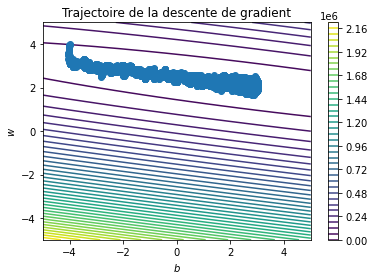

In [162]:
trajectoire(Xi,f)

**Exercice**

Commenter la représentation de la trajectoire de l'algorithme près de la solution (ci-dessous, la commande permet de tracer les 100 dernières étapes de l'algorithme sur la fenêtre $(b,w)\in[2.8,3.2]\times[1.8,2.2]$).

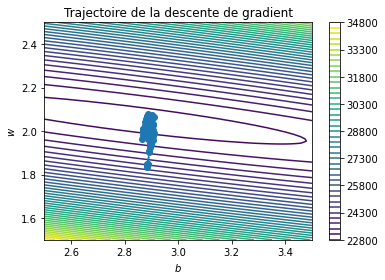

In [163]:
trajectoire(Xi[len(Xi)-100:len(Xi)],f,2.5,3.5,1.5,2.5)

### Calcul du gradient en la moyenne des 100 derniers points

In [167]:
lastpts=np.array(Xi[len(Xi)-100:len(Xi)])
bstar=np.mean(lastpts[:,0])
wstar=np.mean(lastpts[:,1])
print('Gradient de f en (b,w)=(',bstar,',',wstar,') :', df(bstar,wstar))
print('Erreur :\n b:',(bstar-3)/3*100,'%\n w:',(wstar-2)/2*100,'%')

Gradient de f en (b,w)=( 2.8893365403033187 , 2.0030980309651296 ) : [-386.09003887753937, -2737.316006327029]
Erreur :
 b: -3.688781989889378 %
 w: 0.15490154825648084 %


**Exercice**

Commenter

**Exercice**

Proposer un critère d'arrêt pour la méthode du gradient stochastique et la programmer.